In [2]:
import pandas as pd

file_path = 'heart.csv'
data = pd.read_csv(file_path)

data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
#Simple Linear Regression
from sklearn.linear_model import LinearRegression
import numpy as np

X = data['age'].values.reshape(-1, 1)  
y = data['thalach'].values  # 

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

# Calculate R-squared 
r_squared = model.score(X, y)

intercept, slope, r_squared

(202.97928476880983, -0.9895468570307387, 0.15227717008771258)

In [24]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(data['age'], data['thalach'])

# Results of the hypothesis testing
slope, intercept, p_value

(-0.9895468570307396, 202.9792847688099, 1.2738266772095322e-38)

In [23]:
#Logestic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = data[['age', 'chol', 'thalach', 'trestbps']]  
y = data['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(classification_rep)
intercept

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       100
           1       0.70      0.68      0.69       105

    accuracy                           0.69       205
   macro avg       0.69      0.69      0.69       205
weighted avg       0.69      0.69      0.69       205



array([-3.39373765])

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np
import scipy.stats as stats

# One-hot encode categorical variables
cp = pd.get_dummies(data['cp'], prefix='cp')
thal = pd.get_dummies(data['thal'], prefix='thal')
slope = pd.get_dummies(data['slope'], prefix='slope')

# Drop the original categorical variables
x = data.drop(['cp', 'thal', 'slope', 'target'], axis=1)

# Include the one-hot encoded variables
frames = [x, cp, thal, slope]
x = pd.concat(frames, axis = 1)
y = data['target']

# Scaling the features
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=4)

LRclassifier = LogisticRegression(max_iter=1000)
LRclassifier.fit(x_train, y_train)
y_pred_LR = LRclassifier.predict(x_test)
accuracy = accuracy_score(y_pred_LR, y_test)
accuracy

0.848780487804878

Feature  Coefficient  Absolute Coefficient
0          ca    -2.424464              2.424464
1     oldpeak    -2.353695              2.353695
2     thalach     1.299652              1.299652
3         sex    -1.248243              1.248243
4    trestbps    -1.073336              1.073336
..        ...          ...                   ...
247   slope_0     0.004185              0.004185
248   slope_0     0.004185              0.004185
249   slope_0     0.004185              0.004185
250   slope_0     0.004185              0.004185
251       fbs     0.000889              0.000889

[252 rows x 3 columns]

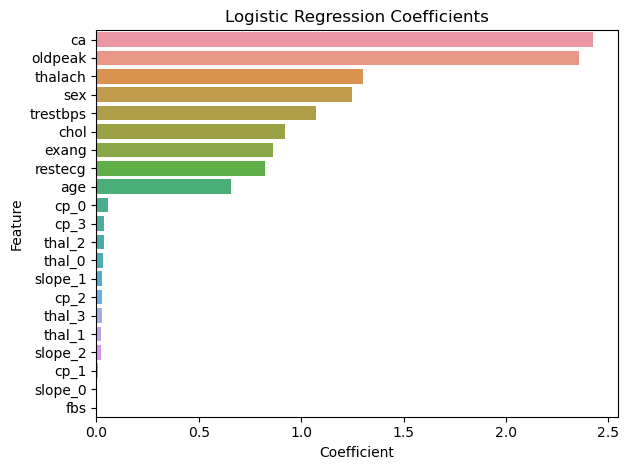

In [76]:
import seaborn as sns
# Coefficients 
coefficients = pd.DataFrame({"Feature": x.columns, "Coefficient": LRclassifier.coef_[0]})

# Sorting the coefficients
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

sns.barplot(x='Absolute Coefficient', y='Feature', data=coefficients_sorted)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()

coefficients_sorted.reset_index(drop=True)

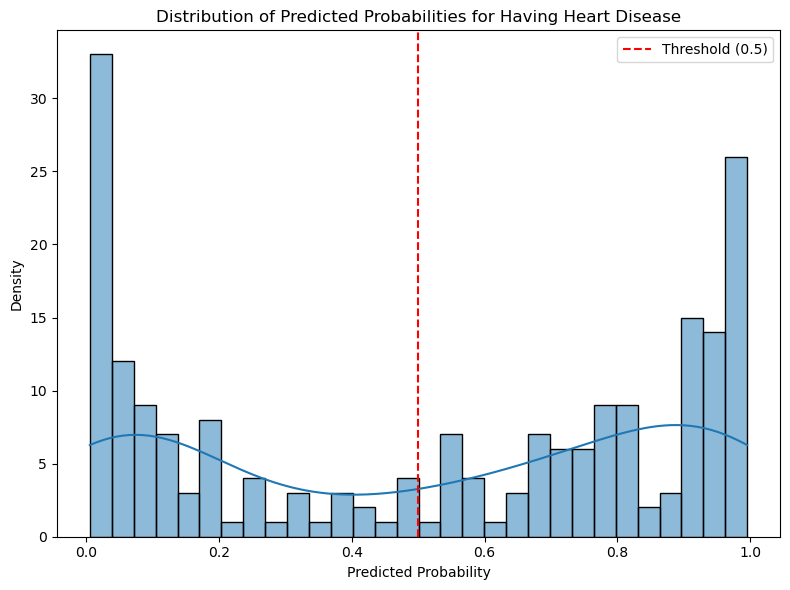

In [78]:
y_pred_prob = LRclassifier.predict_proba(x_test)[:, 1] 

plt.figure(figsize=(8, 6))
sns.histplot(y_pred_prob, bins=30, kde=True,)
plt.title('Distribution of Predicted Probabilities for Having Heart Disease')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.tight_layout()